# **Market Segmentation Case Study : Fast Food**

1. The purpose of this case study is to conduct market segmentation analysis for McDonald's using empirical data.
2. The goal is to identify distinct consumer segments with different perceptions of McDonald's and understand the systematic differences in brand perceptions across these segments. 
3. This information can help McDonald's tailor its marketing strategies to specific segments, either by reinforcing positive perceptions or addressing concerns in segments with negative perceptions.

#### The analysis involves various techniques, including k-means clustering, global stability assessment, segment level stability analysis, and the exploration of mixtures of distribution and regression models.

## **Collecting and Exploring the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mcdonalds.csv")
df.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape

(1453, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


### **Extracting the first 11 cols for market segment analysis**

In [6]:
MD_x = df.iloc[:, :11]

# Converting categorical responses (Yes/No) to binary format (1/0)
MD_x = (MD_x == "Yes").astype(int)

column_means = np.round(MD_x.mean(), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


### **Dimensionality Reduction with PCA**

In [7]:
from sklearn.decomposition import PCA
MD_pca = PCA()
MD_p = MD_pca.fit(MD_x)

#calculating standard deviation, propertion of variance and cumulative propertion
SD = np.sqrt(MD_pca.explained_variance_)
PV = MD_pca.explained_variance_ratio_

#creating index labels for components
index = []
for i in range (len(SD)):
    i = i+1
    index.append("PC{}".format(i))

print("Importance of components:")
summary = pd.DataFrame({ "Standard deviation":SD, "Propertion of Variance":PV, "Cumulative Propertion":PV.cumsum()}, index = index)
summary

Importance of components:


,Standard deviation,Propertion of Variance,Cumulative Propertion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


### **PCA = Rotation Matrix**
The Rotation Matrix provides the relationships between the original features and the principal components.


In [8]:
print("Standard Deviation:\n",SD.round(1))

load = (MD_pca.components_)
i=0
rot_matrix = MD_p.components_.T

# creating dataframe for the rotation matrix
rot_df = pd.DataFrame(rot_matrix, index=MD_x.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


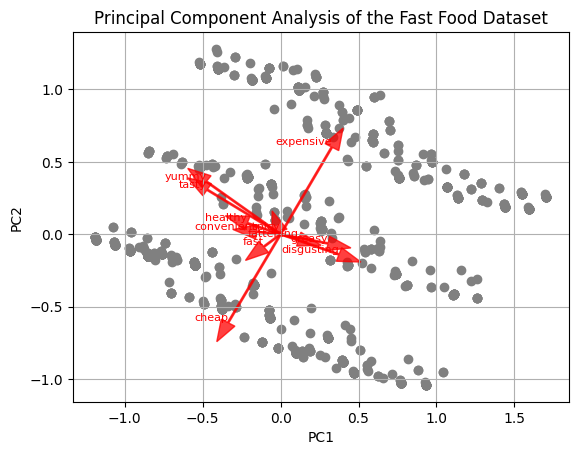

In [9]:
projected_data = MD_pca.transform(MD_x)
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')

for i, feature in enumerate(MD_x.columns):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i],
              color='red', width=0.01, head_width=0.1, alpha=0.75)
    plt.text(MD_pca.components_[0, i], MD_pca.components_[1, i], feature,
             color='red', ha='right', va='bottom', fontsize=8)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis of the Fast Food Dataset')
plt.grid(True)
plt.show()

The resulting perceptual map provides valuable insights into the evaluation of McDonald’s based on consumer perceptions. Key observations include:

- **Attributes Influence:** CHEAP and EXPENSIVE play a pivotal role in shaping McDonald’s evaluation, showing distinct independence from other attributes.
- **Positive vs. Negative Perceptions:** Attributes such as FATTENING, DISGUSTING, and GREASY align in the same direction, indicating a cluster of respondents sharing similar negative perceptions. Conversely, positive attributes (FAST, CONVENIENT, HEALTHY, TASTY, and YUMMY) align in the opposite direction.
- **Price Dimension:** The observations along the EXPENSIVE versus CHEAP axis reveal distinct clusters, highlighting groups of consumers with varying perceptions related to price.

These initial exploratory insights contribute valuable information for segment extraction. The observed attribute relationships and the significance of the price dimension suggest potential differentiation among consumer groups.


## **Extracting Segments**

### **Using k-Means**

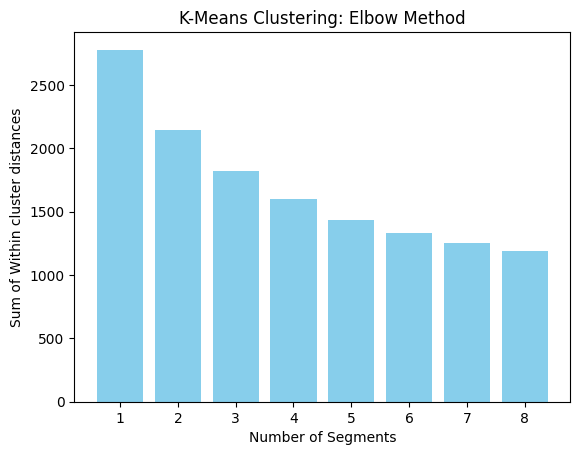

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

# Assuming we already have MD_x as your feature matrix
n_rep = 10
cluster_range = range(1, 9)
inertias = []
kmeans_models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=n_rep)
    kmeans.fit(MD_x)
    inertias.append((kmeans.inertia_))
    kmeans_models[str(k)] = kmeans

# Visualizing the data using a histogram
plt.bar(cluster_range, inertias, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within cluster distances')
plt.title('K-Means Clustering: Elbow Method')
plt.show()


### **Global Stability Analysis**

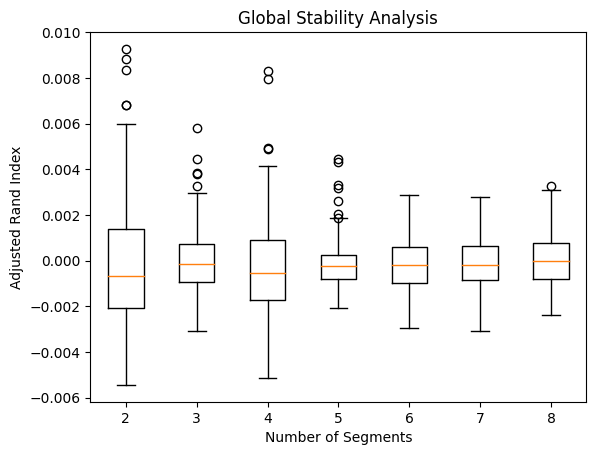

In [11]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

# Defining the range of segments
segment_range = range(2, 9)

# Number of bootstrap samples and random initializations
n_bootstraps = 100
n_init = 10

# Container for storing adjusted Rand indices
stability_scores = []

# Bootstrap and evaluate stability for each number of segments
for k in segment_range:
    rand_indices = []
    for _ in range(n_bootstraps):
        # Bootstrap resampling
        bootstrap_sample = resample(MD_x, random_state=np.random.randint(1, 1000))

        # K-means clustering
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=np.random.randint(1, 1000))
        labels = kmeans.fit_predict(bootstrap_sample)

        # Calculating adjusted Rand index
        true_labels = kmeans.predict(MD_x)
        rand_index = adjusted_rand_score(true_labels, labels)
        rand_indices.append(rand_index)

    stability_scores.append(rand_indices)

# Plotting the global stability boxplot
plt.boxplot(stability_scores, labels=list(segment_range))
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Analysis')
plt.show()


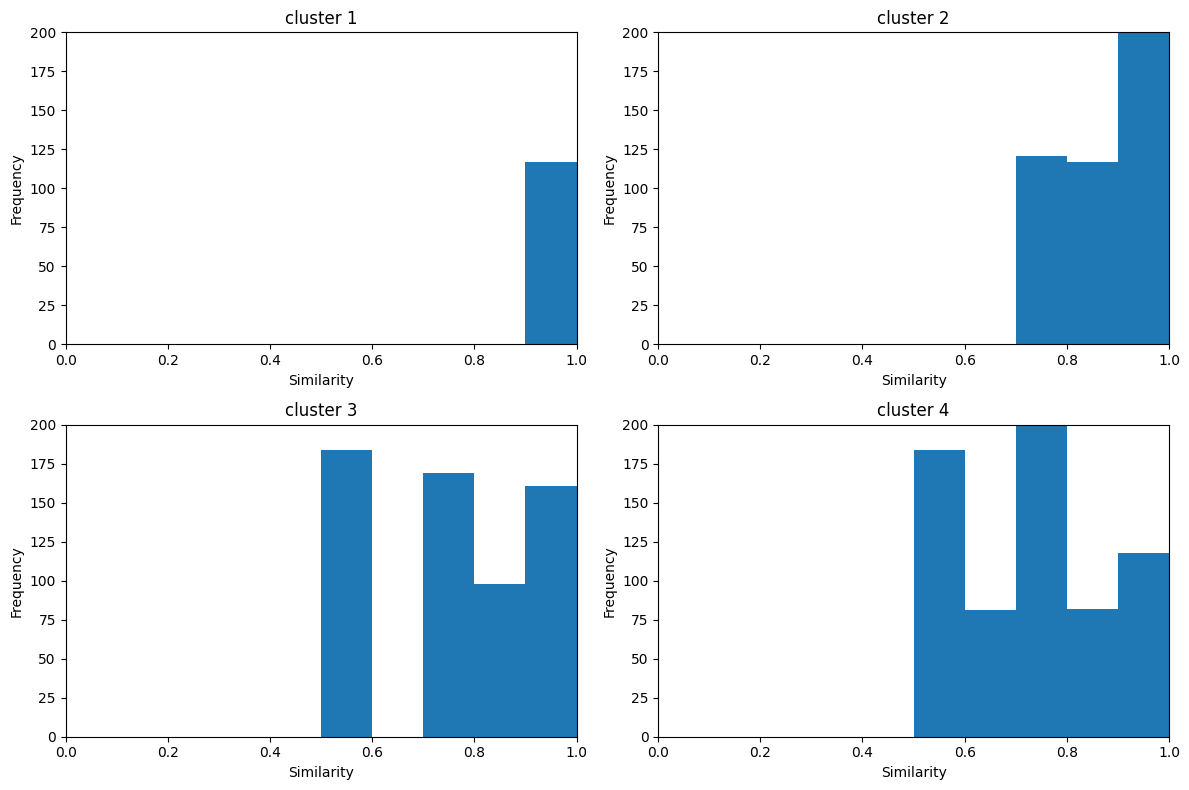

In [12]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

#creating subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Looping Over Clusters and Creating Histograms
for i in range(1, 5):
    # Obtaining Predicted Labels and Similarity Values
    labels = kmeans_models[str(i)].predict(MD_x)
    similarities = kmeans_models[str(i)].transform(MD_x).min(axis=1)
    
    row = (i - 1) // 2  # Row index for the subplot grid
    col = (i - 1) % 2   # Column index for the subplot grid
    
    # Plotting Histograms in Subplots
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))
    
    # Setting Axis Limits and Ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()  # Adjusting the layout to prevent overlapping
plt.show()

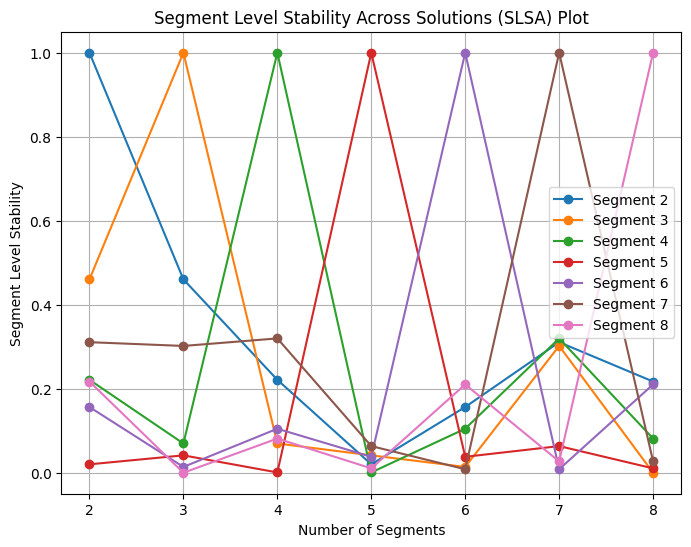

In [13]:
num_segments = range(2, 9)

segment_stability = []

# Loop over segments to obtain predicted labels for each solution
for segment in range(2, 9):
    labels_segment = kmeans_models[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

# Creating a plot for Segment Level Stability Across Solutions (SLSA)
plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    # Plotting stability for each segment using mean of matching labels
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


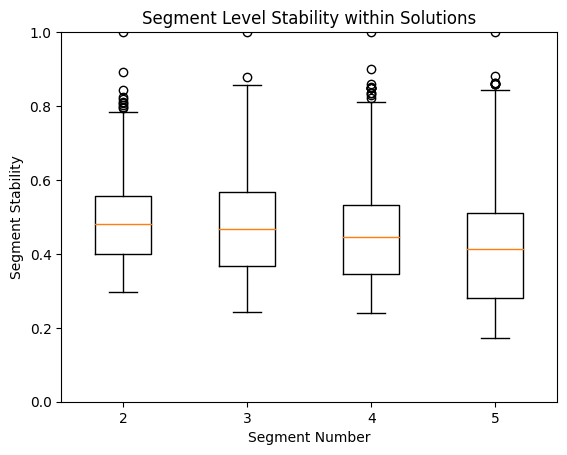

In [14]:
segment_solutions = ["2", "3", "4", "5"] # List of segment solutions to analyze

# Dictionaries to store labels and similarities for each segment solution
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = kmeans_models[segment].predict(MD_x)
    segment_similarities[segment] = kmeans_models[segment].transform(MD_x).min(axis=1)

# List to store normalized similarities for each segment
segment_stability_values = []

for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

# Creating a boxplot to visualize segment level stability within solutions
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

 ## **Using Mixtures of Distributions**

In [15]:
from scipy.stats import entropy

# Setting a random seed for reproducibility
np.random.seed(1234)
k_values = range(2, 9)

# List to store results for each k
MD_m28 = []

# Loop over each k value
for k in k_values:
    # Instantiating and fitting a KMeans model with the current k
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)  # Explicitly set n_init to suppress the warning
    model.fit(MD_x.values)
    # Extracting relevant information from the fitted model
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Calculating class probabilities and entropy for ICL (Integrated Completed Likelihood)
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
    
# Creating a DataFrame from the results
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


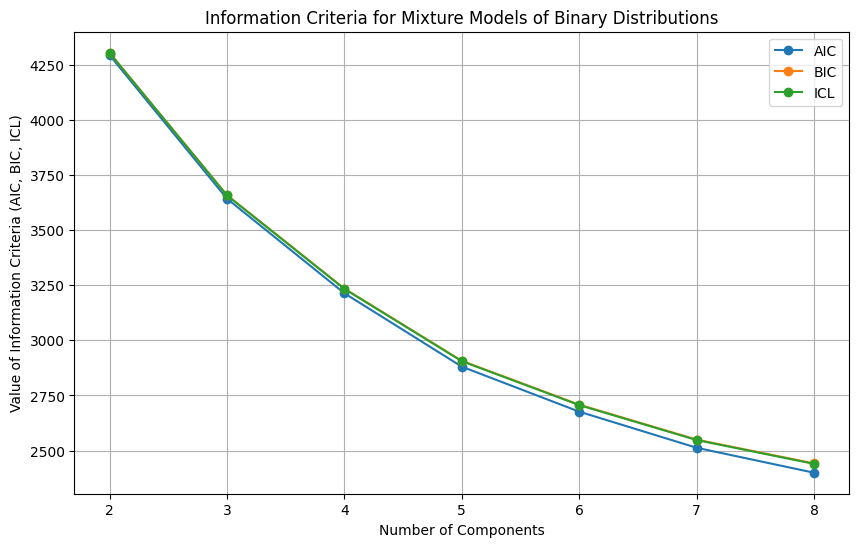

In [16]:
plt.figure(figsize=(10, 6))

# Plotting AIC, BIC, and ICL values for each number of components
plt.plot(MD_m28['k'], MD_m28['AIC'], marker='o', label='AIC')
plt.plot(MD_m28['k'], MD_m28['BIC'], marker='o', label='BIC')
plt.plot(MD_m28['k'], MD_m28['ICL'], marker='o', label='ICL')

plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Mixture Models of Binary Distributions')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 10)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

# Applying Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

# Creating a DataFrame to store cluster assignments from KMeans and GMM
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Extracting a subset of data corresponding to a specific cluster from GMM result
MD_m4 = MD_x[results['mixture'] == 3] 

# Applying KMeans clustering on the subset
k4_m4 = KMeans(n_clusters=k, random_state=1234, n_init = 10)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Creating a DataFrame to store cluster assignments from KMeans on the subset
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


In [18]:
from sklearn.mixture import GaussianMixture

# Creating a GMM model with 4 components and fitting it to the data (MD_x)
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

# Calculating the log-likelihood for the fitted model (MD.m4a)
log_likelihood_m4a = gmm_m4a.score(MD_x)

# Creating another GMM model with 4 components and fitting it to the data (MD_x)
gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

# Calculating the log-likelihood for the fitted model (MD.m4)
log_likelihood_m4 = gmm_m4.score(MD_x)

# Printing the log-likelihood values for both models
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765798


### **Using Mixtures of Regression Models**

In [19]:
# Counting the occurrences of each unique value in the 'Like' column
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [20]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)

like_n_counts = df['Like.n'].value_counts()

print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [21]:
from patsy import dmatrices

independent_vars = df.columns[0:11] 

formula_str = ' + '.join(independent_vars)

# Create the formula for the linear model, specifying 'Like' as the dependent variable
formula_str = 'Like ~ ' + formula_str

# Useing patsy's dmatrices function to create design matrices for the linear model
f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [22]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix

np.random.seed(1234)

# Creating design matrices for the independent and dependent variables
X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

# Setting the number of components for the Gaussian Mixture Model
n_components = 2

n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


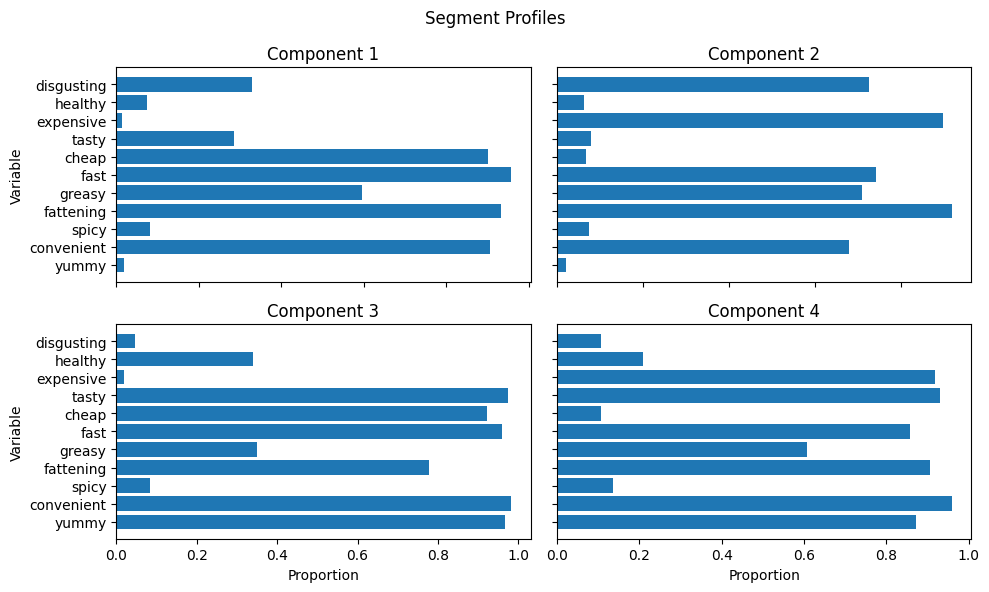

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Accessing the K-Means model with 4 clusters
kmeans = kmeans_models['4']

# Getting cluster labels for each data point
labels = kmeans.labels_

# Grouping the original data (MD_x) by cluster labels and calculating mean values for each variable
MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Setting common labels and ticks for all subplots
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

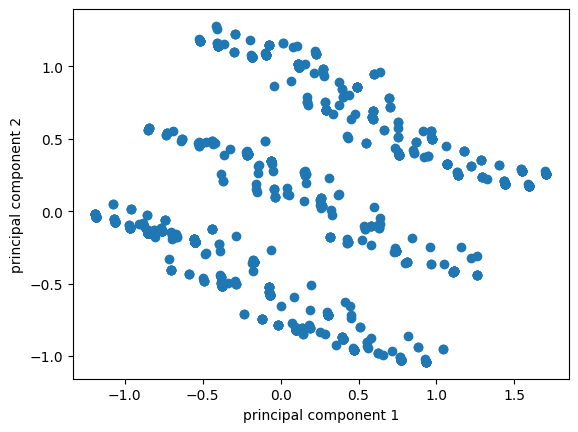

In [24]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(MD_x)

# Applying PCA to reduce data to 2 principal components
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Creating a scatter plot of the data points in the reduced space
fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

### **Describing Segments**

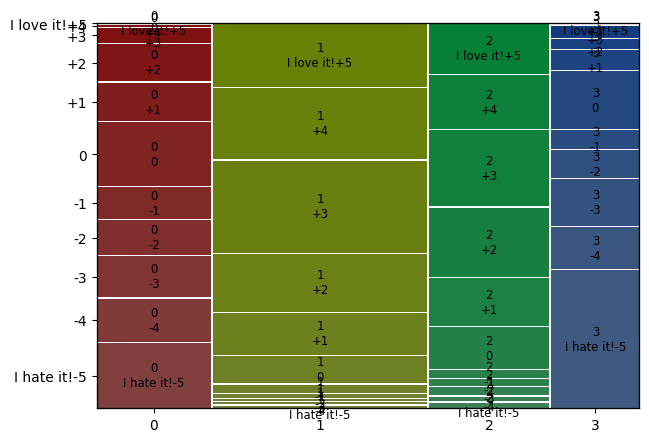

In [25]:
#Moasic plot
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

df1=pd.read_csv("mcdonalds.csv")

#Label encoding for categorical - Converting 11 cols with yes/no
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1
    
#Specifying categorical variable for label encoding
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
    
df_eleven = df1.loc[:,cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init = 10).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_ 

# Creating a cross-tabulation (contingency table) between cluster labels and 'Like'
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])

# Reordering columns to match the 'Like' ordering
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

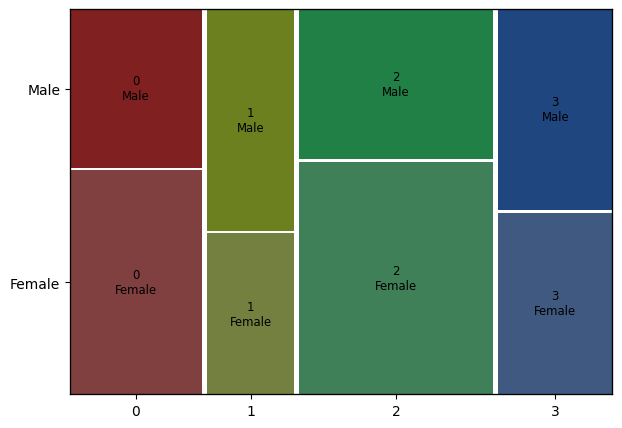

In [26]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=kmeans_models['4']
k4 = MD_k4.labels_

# Creating a cross-tabulation (contingency table) between cluster labels and 'Gender'
ct = pd.crosstab(k4, df['Gender'])

mosaic(ct.stack(),gap=0.01)
plt.show()

Text(0.5, 1.0, 'Parallel box-and-whisker plot of age by segment')

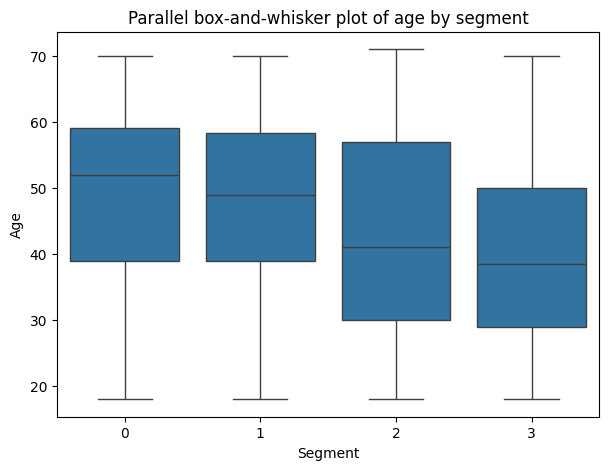

In [29]:
import seaborn as sns
df = pd.DataFrame({'Segment': k4, 'Age': df['Age']})
sns.boxplot(x="Segment", y="Age", data=df)
plt.title('Parallel box-and-whisker plot of age by segment')


### **Selecting Target Segment**

In [30]:
# Label encoding for 'VisitFrequency'
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])

# Grouping by 'cluster_num' and calculating the mean of 'VisitFrequency' for each cluster
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()

visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [31]:
# Label encoding for 'Like'
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])

# Grouping by 'cluster_num' and calculating the mean of 'Like' for each cluster
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [32]:
# Label encoding for 'Gender'
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])

# Grouping by 'cluster_num' and calculating the mean of 'Gender' for each cluster
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


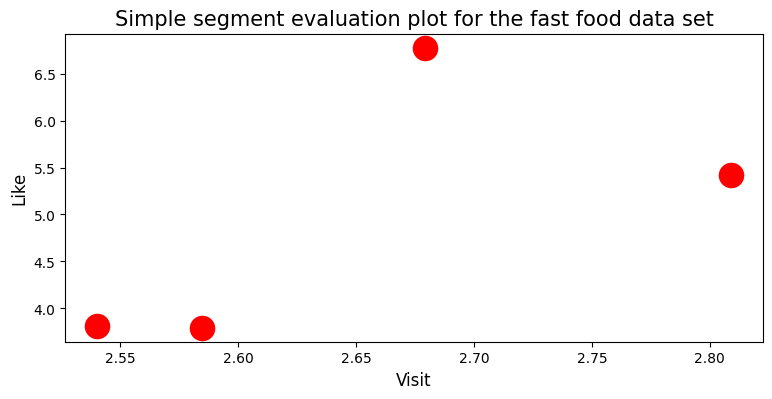

In [33]:
import seaborn as sns

# Merging the Gender, Like, and Visit DataFrames on 'cluster_num'
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

#### **Hierarchical Clustering: Dendrogram Analysis for Cluster Detection**

In [34]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

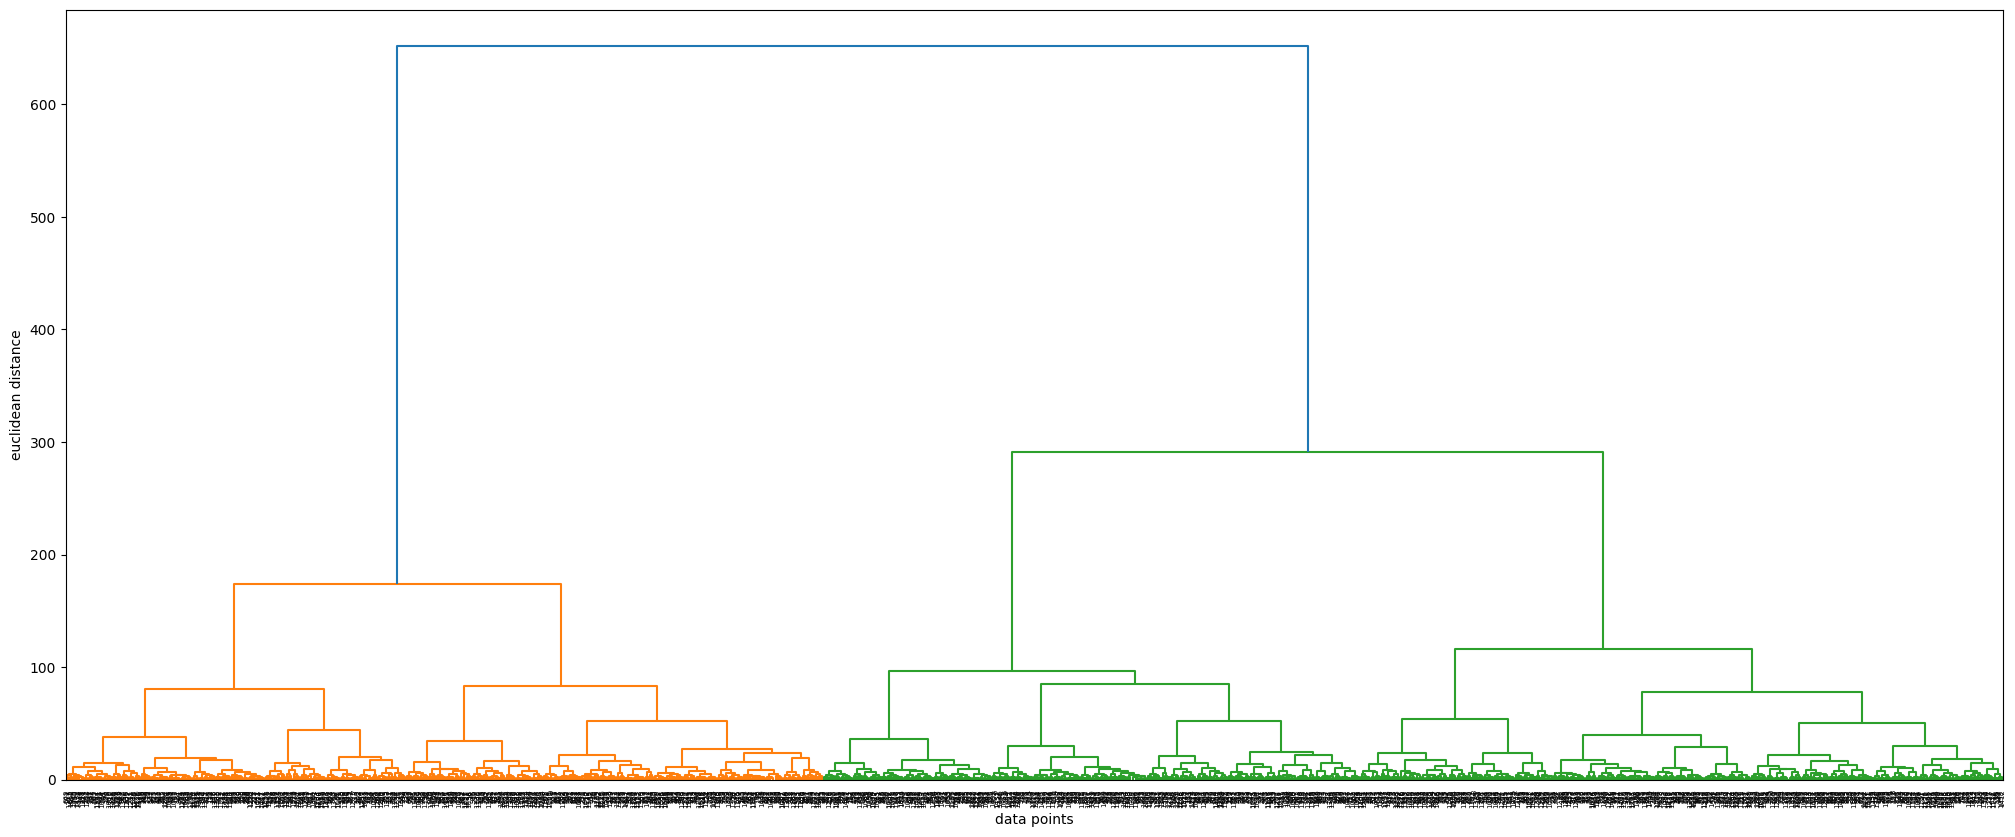

In [35]:
# Dropping non-numeric columns for clustering
data_model = df1.drop(['Gender'],axis=1)

# Performing hierarchical clustering
merg = shc.linkage(data_model,method="ward")

plt.figure(figsize=(25,10))
shc.dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

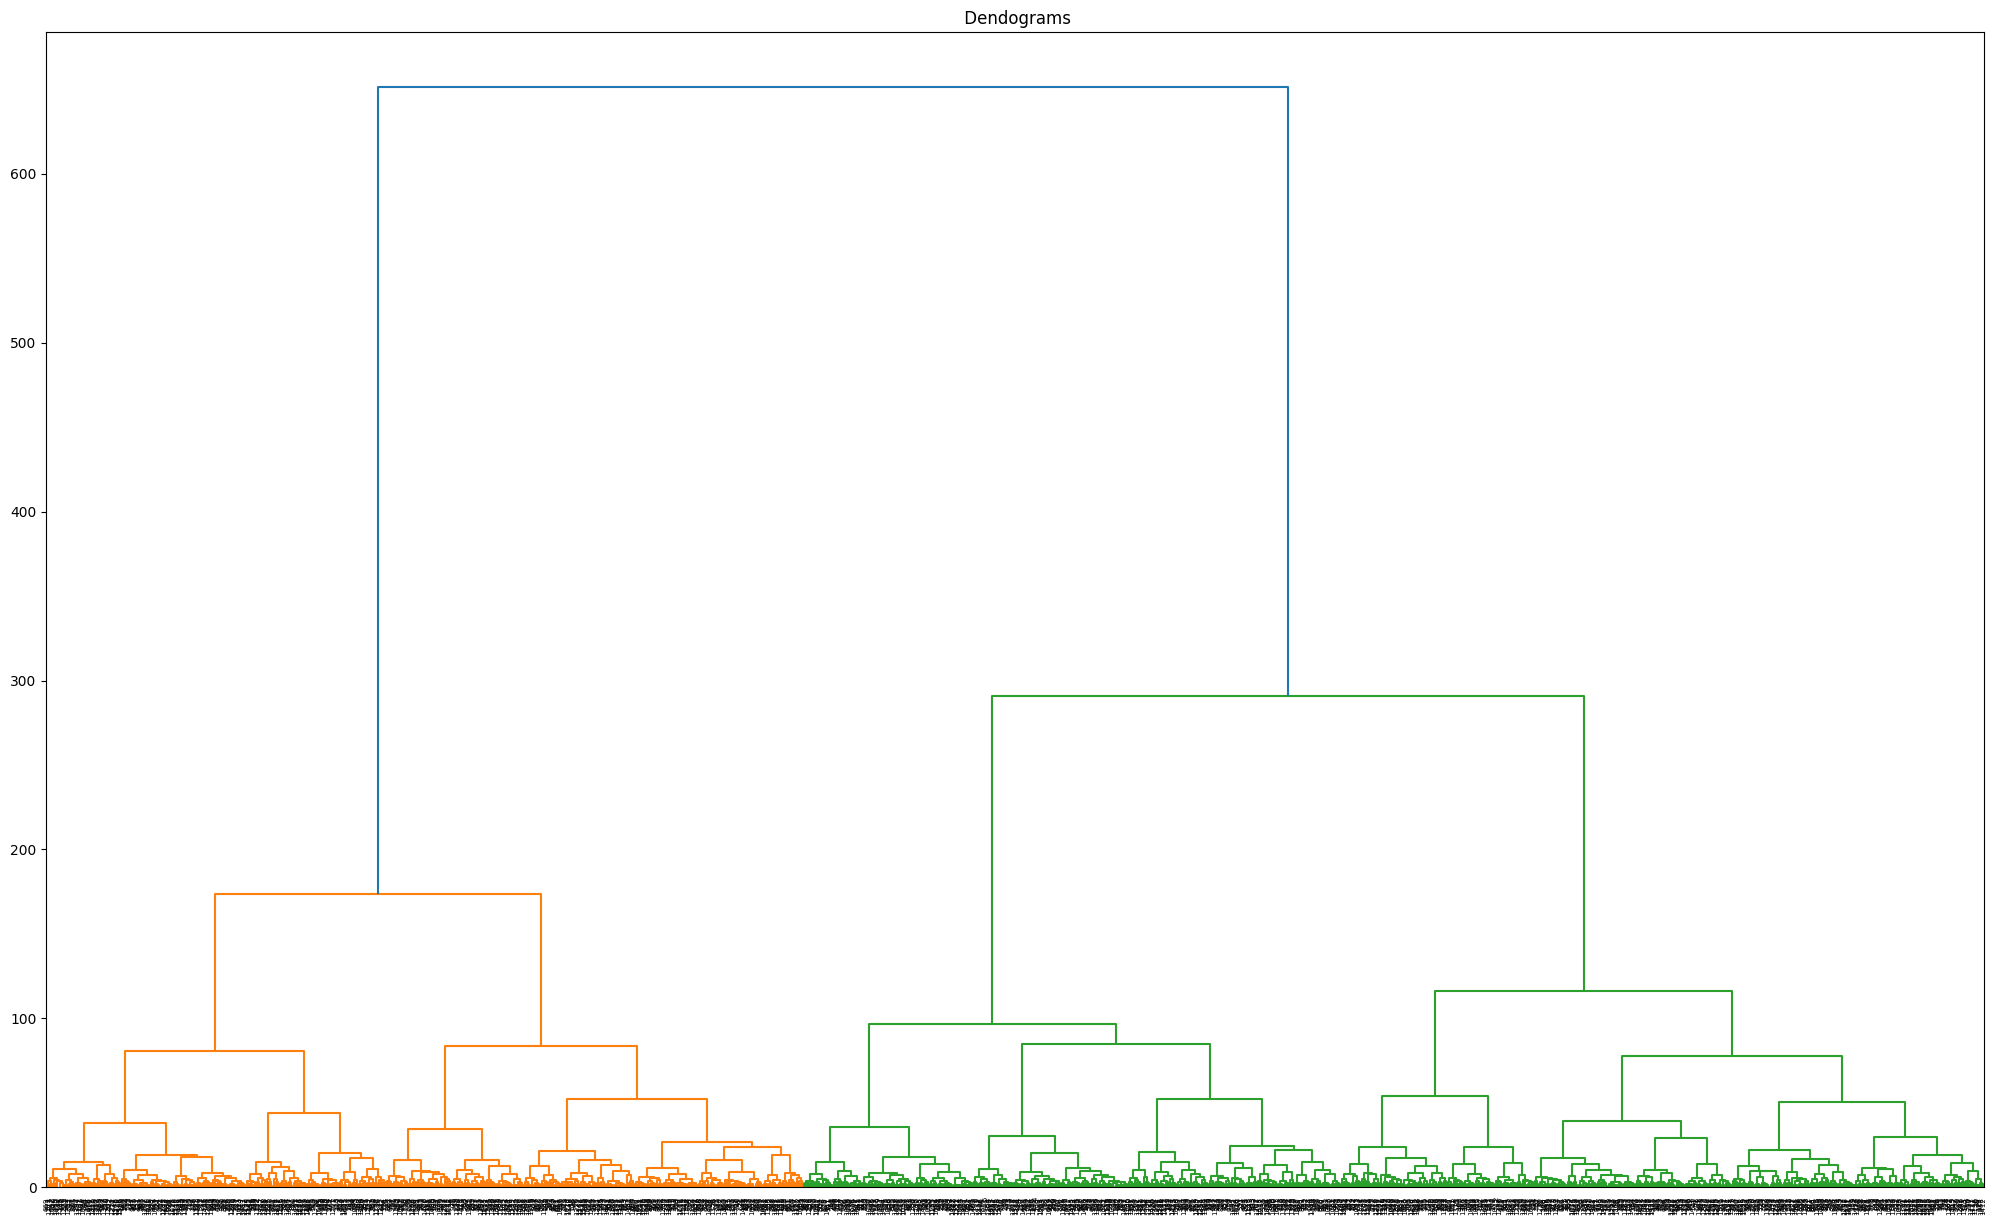

In [36]:
data_model = df1.drop(['Gender'],axis=1)
plt.figure(figsize=(25, 15))  
plt.title(" Dendograms")  
dend = shc.dendrogram(shc.linkage(data_model, method='ward')) 

In [37]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 4,affinity= "euclidean",linkage = "ward")
hierarchical_cluster.fit_predict(data_model)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 2, 0, ..., 2, 2, 1], dtype=int64)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


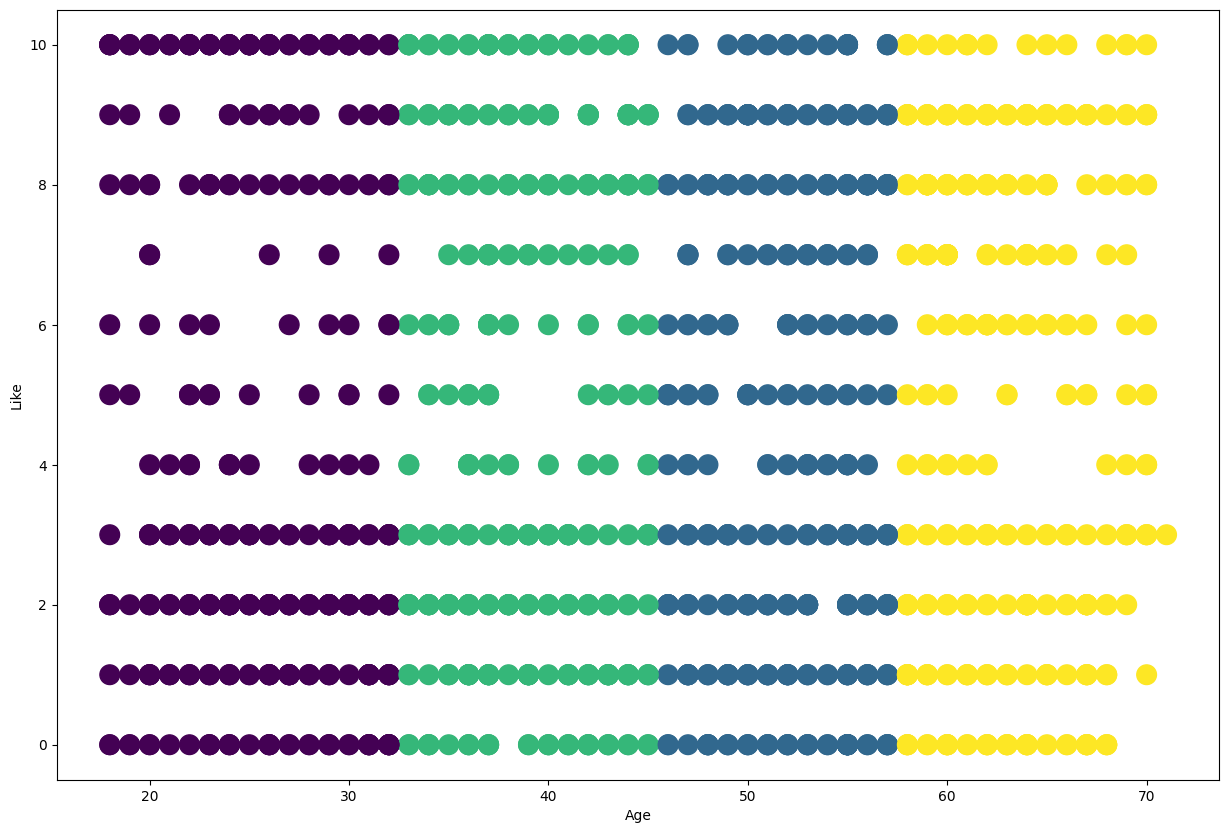

In [38]:
# Creating an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the KMeans model and predicting cluster labels for each data point
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'Like' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()

In [39]:
data_predict

array([3, 1, 3, ..., 1, 2, 0])

### **Evaluation**

In [46]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_model, data_predict)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3736863897683558


Here we are getting a silhouette score of 0.37 which suggests that, on average, the clusters are well-separated and the objects within each cluster are relatively similar to each other compared to neighboring clusters.